In [11]:
import pandas as pd

dfpopulation = pd.read_csv("C:\\Users\\dataBCN\\OneDrive - NETMIND\\BTS\\2020\\Stats4DS\\Lectures\\Session 5\\2008.csv")

df = dfpopulation.sample(frac = 0.00001) 

Using one (or more) subsamples of the dataframe of flights, generate a meaningful example for each of the following tests and procedures:

1. Chi-squared test
2. T-test for independent samples
3. T-test for paired data
4. ANOVA (compare multiple means)
5. Confidence interval for the mean
6. Test if the data is normally distributed (one of the main assumptions, most of the times is not satisfied...)
7. What is bootstrap?!

In [17]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [23]:
df = dfpopulation.sample(frac = 0.00001) 

df["DepartOnTime"] = df.DepDelay > 0
df["ArrivalOnTime"] = df.ArrDelay > 0



# Chisquared

https://www.mathsisfun.com/data/chi-square-test.html

In [28]:
from scipy.stats import chi2_contingency

table = pd.crosstab(df.DepartOnTime, df.ArrivalOnTime,  margins = False) 

table

ArrivalOnTime,False,True
DepartOnTime,,
False,30,8
True,5,27


In [30]:
chi2_contingency(table)[0]

25.386513157894736

In [31]:
chi2_contingency(table)[1]

4.6918690316739057e-07

In [34]:
chi2_contingency(table)[2]

1

In [35]:
chi2_contingency(table)[3]

array([[19., 19.],
       [16., 16.]])

# T-test independent

In [54]:
from scipy.stats import ttest_ind

df1 = dfpopulation.sample(frac = 0.00001)
df2 = dfpopulation.sample(frac = 0.00001)



In [55]:
print(df1.ArrDelay.mean())
print(df2.ArrDelay.mean())

6.328571428571428
13.617647058823529


In [58]:
ttest_ind(df1.ArrDelay.dropna(), df2.ArrDelay.dropna(),equal_var = False)

Ttest_indResult(statistic=-0.9599965244865051, pvalue=0.33906176189173687)

# T-test Paired

In [97]:
from scipy.stats import ttest_rel

ttest_ind(df1.ArrDelay.dropna(), df1.DepDelay.dropna(),equal_var = False)

Ttest_indResult(statistic=-0.37762666558466906, pvalue=0.7062888400860197)

# Confidence Interval for the Mean (small sample size)

In [91]:
import statsmodels.stats.api as sms

sms.DescrStatsW(df1["ArrDelay"]).tconfint_mean()

(-1.9252719271968752, 14.582414784339733)

# Compare Multiple Means 

In [137]:
from scipy.stats import f_oneway

df3 = dfpopulation.sample(frac = 0.0001)

df3 = df3[df3["UniqueCarrier"].isin(["OO","9E","MQ"])]

In [87]:
f_oneway(df3.ArrDelay[df3.UniqueCarrier == "OO"].dropna(),
        df3.ArrDelay[df3.UniqueCarrier == "9E"].dropna(),
        df3.ArrDelay[df3.UniqueCarrier == "MQ"].dropna())

F_onewayResult(statistic=1.4253320747431852, pvalue=0.2444034867968573)

In [89]:
print(df3.ArrDelay[df3.UniqueCarrier == "OO"].mean())
print(df3.ArrDelay[df3.UniqueCarrier == "9E"].mean())
print(df3.ArrDelay[df3.UniqueCarrier == "MQ"].mean())

8.653061224489797
1.3571428571428572
-0.9583333333333334


# Test Normality

Graphically

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


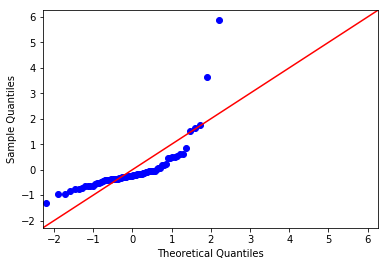

In [92]:
from statsmodels.graphics.gofplots import qqplot

qqplot(df1.ArrDelay,  fit = True,line = "45").show()

Testing

In [69]:
from scipy.stats import kstest

kstest(df1.ArrDelay,"norm")

KstestResult(statistic=0.4772498680518208, pvalue=3.552713678800501e-15)

# Bootstrap?!

In [128]:
df = dfpopulation.sample(frac = 0.00001) 

df.ArrDelay.mean()

4.492753623188406

In [129]:
df.ArrDelay.sample(frac = 1, replace = True).mean()

4.75

In [130]:
listofmeans = []

for i in range(5000):
    listofmeans.append(df.ArrDelay.sample(frac = 1, replace = True).mean())

listofmeans[0:5]

[-0.11428571428571428,
 1.7826086956521738,
 -2.101449275362319,
 9.313432835820896,
 2.0285714285714285]

(array([  2.,   4.,   4.,  16.,  24.,  43.,  58.,  98., 115., 157., 212.,
        250., 281., 294., 347., 347., 343., 335., 335., 309., 274., 251.,
        198., 173., 134., 105.,  78.,  63.,  37.,  37.,  23.,  20.,  14.,
          3.,   3.,   5.,   2.,   1.,   4.,   1.]),
 array([-6.98571429, -6.30708592, -5.62845756, -4.94982919, -4.27120083,
        -3.59257246, -2.9139441 , -2.23531573, -1.55668737, -0.87805901,
        -0.19943064,  0.47919772,  1.15782609,  1.83645445,  2.51508282,
         3.19371118,  3.87233954,  4.55096791,  5.22959627,  5.90822464,
         6.586853  ,  7.26548137,  7.94410973,  8.6227381 ,  9.30136646,
         9.97999482, 10.65862319, 11.33725155, 12.01587992, 12.69450828,
        13.37313665, 14.05176501, 14.73039337, 15.40902174, 16.0876501 ,
        16.76627847, 17.44490683, 18.1235352 , 18.80216356, 19.48079193,
        20.15942029]),
 <a list of 40 Patch objects>)

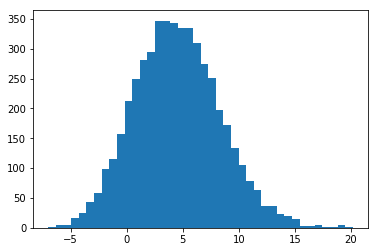

In [131]:
import matplotlib.pyplot as plt

plt.hist(listofmeans,40)

In [132]:
import numpy as np

np.percentile(listofmeans,[2.5,97.5])

array([-2.49275362, 12.41464286])